In [2]:
## All imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Getting our data ready to be used with machine learning

Three main things we have to do:
1. Split the data into features and labels (usually `X` & `y`)
2. Filling (also called imputing) or desregarding missing values
3. Converting non-numerical values to numerical values (also called feature encoding)


In [3]:
heart_disease = pd.read_csv("./data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
X = heart_disease.drop("target",axis=1)
y = heart_disease['target']

In [5]:
#Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [6]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [7]:
X.shape

(303, 13)

## 1.1 Make sure it's all numerical

In [8]:
car_sales = pd.read_csv("./data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [9]:
car_sales = pd.read_csv("./data/car-sales-extended.csv")
X = car_sales.drop("Price",axis=1)
y = car_sales['Price']

In [10]:
#Build machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one-hot",
                                 one_hot,
                                 categorical_features)],
                                 remainder='passthrough')
transformed_X =transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]], shape=(1000, 13))

In [11]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [12]:
dummies = pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [13]:
# Let's refit the model
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(transformed_X,
                                                y,
                                                test_size=0.2)
model.fit(X_train,y_train)

RandomForestRegressor()

In [14]:
f"Result:{model.score(X_test,y_test) * 100:.2f}%"

'Result:32.36%'

### 1.2 What if there were missing values ? 
1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.


In [15]:
#Import car sales missing data
car_sales_missing = pd.read_csv('./data/car-sales-extended-missing-data.csv')
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [16]:
#Let's try and convert data to numbers
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing['Price']


In [17]:
# Turn categories into numerical data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one-hot",
                                  one_hot
                                  ,categorical_features)],remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4000 stored elements and shape (1000, 16)>

#### Option 1:Fill missing data with Pandas


In [18]:
# Fill the 'Make' column
car_sales_missing['Make'].fillna('missing',inplace=True)
#Fill the 'Colour' column
car_sales_missing['Colour'].fillna("missing",inplace=True)
# Fill the 'Odometer (KM)' column
car_sales_missing['Odometer (KM)'].fillna("missing",inplace=True)
#Fill the 'Doors' column
car_sales_missing['Doors'].fillna(4,inplace=True)

C:\Users\Ltaief\AppData\Local\Temp\ipykernel_7584\1277916721.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing['Make'].fillna('missing',inplace=True)
C:\Users\Ltaief\AppData\Local\Temp\ipykernel_7584\1277916721.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [19]:
#Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [20]:
#Remove rows with missing 'Price' value
car_sales_missing.dropna(inplace=True)

In [21]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [22]:
len(car_sales_missing)

950

In [23]:
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing['Price']

In [24]:
# Turn categories into numerical data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one-hot",
                                  one_hot
                                  ,categorical_features)],remainder='passthrough')
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.0, 1.0, 0.0, ..., 0.0, 35431.0, 15323.0],
       [1.0, 0.0, 0.0, ..., 1.0, 192714.0, 19943.0],
       [0.0, 1.0, 0.0, ..., 0.0, 84714.0, 28343.0],
       ...,
       [0.0, 0.0, 1.0, ..., 0.0, 66604.0, 31570.0],
       [0.0, 1.0, 0.0, ..., 0.0, 215883.0, 4001.0],
       [0.0, 0.0, 0.0, ..., 0.0, 248360.0, 12732.0]],
      shape=(950, 16), dtype=object)

### Option 2: Fill missing values with Scikit-Learn

In [25]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [26]:
# Drop the rows with no lables
car_sales_missing.dropna(subset=['Price'],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [27]:
# Split into X & y
X =car_sales_missing.drop("Price",axis=1)
y = car_sales_missing['Price']

In [28]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [29]:
# Fill missing values with sickit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
# Fill catgorical values with missing and numercial values with mean
cat_imputer = SimpleImputer(strategy='constant',fill_value='missing')
door_imputer = SimpleImputer(strategy='constant',fill_value=4)
num_imputer = SimpleImputer(strategy='mean')
# Define columns
cat_features = ['Make','Colour']
door_feature = ['Doors']
num_features = ['Odometer (KM)'] 
# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat-imputer",cat_imputer,cat_features),
    ("door-imputer",door_imputer,door_feature),
    ("num-imputer",num_imputer,num_features)
])
# Tranform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], shape=(950, 4), dtype=object)

In [30]:
car_sales_filled = pd.DataFrame(filled_X,columns=['Make','Colour','Doors','Odometer (KM)'])
car_sales_filled.head()
car_sales.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [31]:
# Let's try and convert our data to numbers 
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
tranformer = ColumnTransformer([('one-hot',
                                one_hot,
                                categorical_features)],
                              remainder='passthrough')
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [32]:
#Now we've got our data as numbers filled (no missing values)
#Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(transformed_X,
                                                y,
                                                test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.21990196728583944

## 2.1 Picking a machine learning model for a regression problem

In [33]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [34]:
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [35]:
housing_df["target"] = housing['target']

In [36]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [37]:
# Import algorithm/estimator
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
# Setup random seed
np.random.seed(42)
# Create the data 
X = housing_df.drop("target",axis=1)
y = housing_df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# Instantiate and fit model (on the training set)
model = Ridge()
model.fit(X_train,y_train)
# Check the score of the model (on the test set)
model.score(X_test,y_test)

0.5758549611440127

In [38]:
# My own try
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
X = housing_df.drop("target",axis=1)
y = housing_df['target']
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.2)
model = Lasso(alpha=0.1)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.2860493716096385

What if `Ridge` didn't work or the score didn't fit our needs?

Well, we can always try a different model

How about we try an ensemble model (an ensemble is combination of smaller models to try and make better prediction 
than just a simple model)?

In [39]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# Setup random seed
np.random.seed(42)
# Create the data
X = housing_df.drop("target",axis=1)
y = housing_df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.806652667101436

In [40]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
len(heart_disease)

303

Consulting the map and it says to try `LinearSVC`.

In [42]:
# Import a LinearSVC estimator class
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
#setup random seed
np.random.seed(42)
# make data
X = heart_disease.drop("target",axis=1)
y = heart_disease['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# Instantiate linearSVC
clf = LinearSVC(max_iter = 1000)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8688524590163934

In [43]:
# Import a RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#setup random seed
np.random.seed(42)
# make data
X = heart_disease.drop("target",axis=1)
y = heart_disease['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# Instantisiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8524590163934426

Tidbit:
   1. If you have structured data use enemsble methods
   2. If you have unstructed data use deep learning or transfer learning`

## 3. Fit the model\algorithm on our data and use it to make predictions 

### 3.1 Fitting the model to the data
Different names for:
* `X` = features, features variables, data
* `y` = labels, targets,target variables

In [44]:
# Import a RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#setup random seed
np.random.seed(42)
# make data
X = heart_disease.drop("target",axis=1)
y = heart_disease['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# Instantisiate RandomForestClassifier
clf = RandomForestClassifier()
# Fit the model to the data
clf.fit(X_train,y_train)
# Evaluate random forest classifier
clf.score(X_test,y_test)

0.8524590163934426

In [45]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [46]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model
2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [47]:
# Use a trained model to make predictions
clf.predict(np.array([1,2,56,67,26,712,1])) # this doesnt work

c:\Users\Ltaief\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[  1.   2.  56.  67.  26. 712.   1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [48]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [49]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]])

In [50]:
# Compare predictions to truth lables to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds==y_test)

np.float64(0.8524590163934426)

In [51]:
clf.score(X_test,y_test)

0.8524590163934426

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

Make predictions with `predict_proba()`

In [53]:
# predict proba returns probabilites of a classfication model
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [54]:
# Let's predict on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

`predict()` can also be used for regression models.

In [55]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [56]:
# get the randoms forest regressor model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# set the random seed
np.random.seed(42)
# get the data
X = housing_df.drop("target",axis=1)
y = housing_df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = RandomForestRegressor()
# Fit the model to the data
model.fit(X_train,y_train)
# Make predictions
y_preds = model.predict(X_test)

In [57]:
y_preds[:10]

array([0.4939   , 0.75494  , 4.9285964, 2.54024  , 2.33176  , 1.6602201,
       2.3431   , 1.66311  , 2.47489  , 4.8344779])

In [58]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [59]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.32656738464147306

## 4. Evaluating a machine learning model
Three ways to evaluate Sickit-Learn models/estimators:
   1. Estimator's built-in `score()` method
   2. The `scoring` paramater
   3. Problem-specific metric functions

### 4.1 Evaluating a model with the `score` method

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# setup random seed
np.random.seed(42)
# create data
X = heart_disease.drop("target",axis=1)
y = heart_disease['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# create classifier model instance
clf = RandomForestClassifier()
# Fit the model to the data (training the machine learning model)
clf.fit(X_train,y_train)


RandomForestClassifier()

In [61]:
clf.score(X_train,y_train)

1.0

In [62]:
clf.score(X_test,y_test)

0.8524590163934426

Let's use the `score()` method on our regression problem...

In [63]:
len(heart_disease)

303

In [64]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
# setup the random seed
np.random.seed(42)
# get the data
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# Instantiate the Ridge model
model = Ridge()
# Fit the model to the data
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.5351464847153691

In [65]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# #setup random seed
# np.random.seed(42)
# # get the data
# X = housing_df.drop("target",axis=1)
# y = housing_df["target"]
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# # Instantiate RandomForestRegressor
# model = RandomForestRegressor(n_estimators=1000)
# model.fit(X_train,y_train)

In [66]:
# model.score(X_test,y_test)

### 4.2 Evaluating a model using the `scoring` parameter

In [67]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
# setup random seed
np.random.seed(42)
# create data
X = heart_disease.drop("target",axis=1)
y = heart_disease['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# create classifier model instance
clf = RandomForestClassifier()
# Fit the model to the data (training the machine learning model)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [68]:
clf.score(X_test,y_test)

0.8524590163934426

In [69]:
cross_val_score(clf,X,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [70]:
np.random.seed(42)
# Single training and test split score
clf_single_score = clf.score(X_test,y_test)
# Take the mean of 5 fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf,X,y))
# Compare the two
clf_single_score,clf_cross_val_score

(0.8524590163934426, np.float64(0.8248087431693989))

In [71]:
# Default scoring paramter of classfier = mean accuracy
clf.score(X_test,y_test)

0.8524590163934426

In [72]:
# Scoring parameter set to None by default
cross_val_score(clf,X,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classfication model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion metrics
4. Classification report
**Accuracy**

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf,X,y,cv=5)

In [74]:
cross_val_mean=np.mean(cross_val_score)

In [75]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {cross_val_mean*100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operating characteristics curve (AUC/ROC)**

* Area under the curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when the truth is 1
* False positive = model predicts 1 when the truth is 0
* True negative = model predicts 0 when the truth is 0
* False negative = model predicts 1 when the truth is 0

In [76]:
# Create X_test,y_test.. etc
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [77]:
from sklearn.metrics import roc_curve
# Fit the classfier to the data
clf.fit(X_train,y_train)
# Make prediction with probabilities 
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [78]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [79]:
# Calculate fpr , tpr and thresholds
fpr,tpr,threshholds = roc_curve(y_test,y_probs_positive)
# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

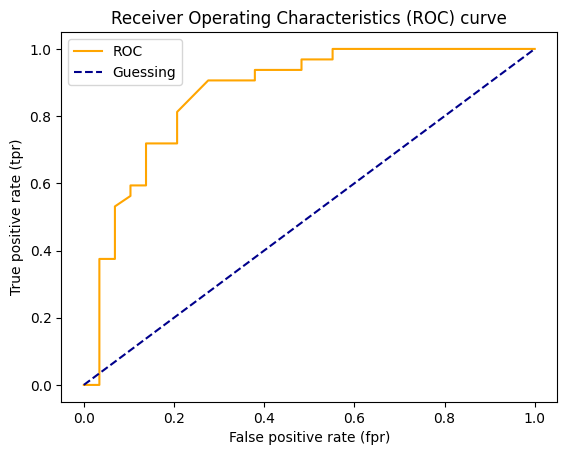

In [80]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    """
        Plots a ROC curve given the false positive rate (fpr)
        and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr,tpr,color="orange", label ="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--", label="Guessing")
    #Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [81]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

np.float64(0.8669181034482759)

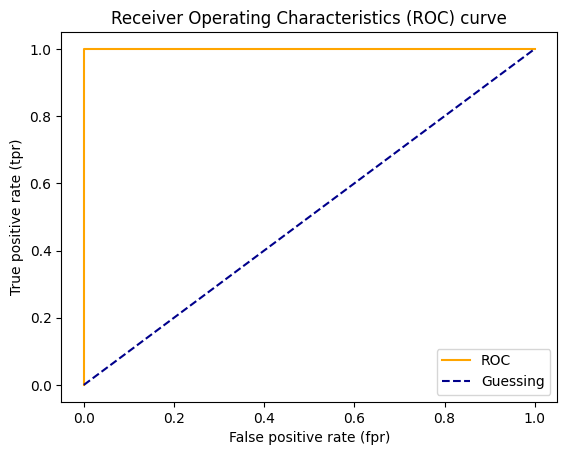

In [82]:
# Plot perfect ROC curve and AUC score
fpr,tpr,threshhold = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [83]:
# Perfect AUC score
roc_auc_score(y_test,y_test)

np.float64(1.0)

**Confusion Matrix**

A confusion matrix is a quick to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [84]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]])

In [85]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,y_preds,rownames = ["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [86]:
23+6+6+26

61

In [87]:
len(X_test)

61

## Creating a confusion matrix using scikit-learn

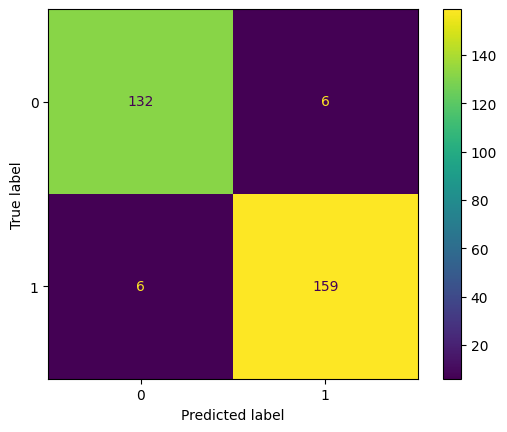

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y)

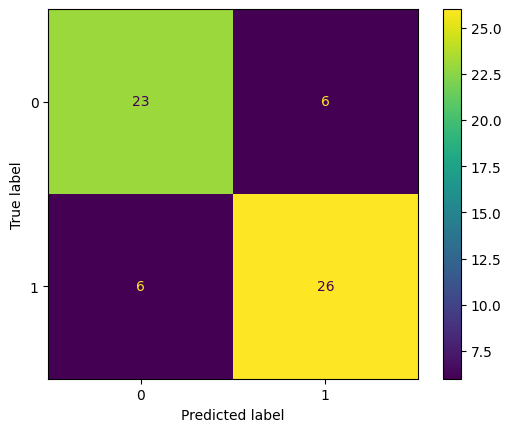

In [89]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds)

## Classification Report

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [93]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case
disease_preds = np.zeros(10000) # model predicts every case as 0
pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

c:\Users\Ltaief\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ltaief\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ltaief\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics: 
* **Accuracy** is good measure to start if all classes are blaanced (e.g. same amount of samples )
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall

### 4.2.2 Regression model evaluation metrics

The eone we're going to cover are:
1. R**2 (pronounced r-square) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [95]:
from sklearn.ensemble import RandomForestRegressor
from  sklearn.model_selection import train_test_split
np.random.seed(42)
X=housing_df.drop("target",axis=1)
y=housing_df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

RandomForestRegressor()

In [97]:
model.score(X_test,y_test)

0.806652667101436

In [100]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**R^2**

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a veriy poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model pertfectly predicts a range of numbers it's R^2 value would be 1.

In [ ]:
from sklearn.metrics import r2_score

# Fill an array with the y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())
y_test_mean[:10]
r2_score(y_true=y_test,y_pred=y_test_mean)

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predicitions and actual values.

It gives you and idea of how wrong your models predictions are.

In [108]:
# MAE 
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)
mae

0.32656738464147306

In [113]:
df = pd.DataFrame(data={"actual values":y_test,
                        "predicted values":y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head()

,actual values,predicted values,differences
20046,0.47700,0.493900,0.016900
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540240,0.354240
9814,2.78000,2.331760,-0.448240


In [118]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

np.float64(0.32656738464147306)

**Mean squared error (MSE)**
MSE is the mean of the square of the errors between actual and predicted values.

In [120]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
mse

0.25336408094921037

In [124]:
df['squared differences'] = np.square(df['differences'])
df

,actual values,predicted values,differences,squared differences
20046,0.47700,0.493900,0.016900,0.000286
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540240,0.354240,0.125486
9814,2.78000,2.331760,-0.448240,0.200919
...,...,...,...,...
15362,2.63300,2.219830,-0.413170,0.170709
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [137]:
# Calculate MSE by hand
squared = np.square(df['differences'])
squared.mean()

np.float64(0.25336408094921037)